In [1]:
import os
import zipfile

In [4]:
local_zip = 'dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

"\nlocal_zip = 'dataset.zip'\nzip_ref = zipfile.ZipFile(local_zip, 'r')\nzip_ref.extractall()\nzip_ref.close()\n"

In [2]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

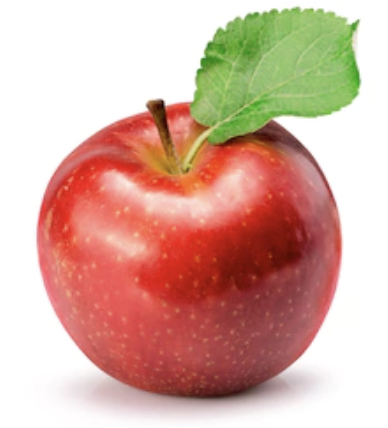

In [3]:
image_1 = load_img('dataset/train/freshapples/Screen Shot 2018-06-08 at 5.00.12 PM.png')
image_1

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
path = os.path.join('dataset')

In [6]:
train_dir = os.path.join(path,'train')

In [7]:
validation_dir = os.path.join(path,'test')

In [8]:
train_fresh_dir = os.path.join(train_dir,'freshapples')
train_rotten_dir = os.path.join(train_dir,'rottenapples')

In [9]:
validation_fresh_dir = os.path.join(validation_dir,'freshapples')
validation_rotten_dir = os.path.join(validation_dir,'rottenapples')

In [10]:
num_fresh_tr = len(os.listdir(train_fresh_dir))
num_rotten_tr = len(os.listdir(train_rotten_dir))
num_fresh_val = len(os.listdir(validation_fresh_dir))
num_rotten_val = len(os.listdir(validation_rotten_dir))
print('Fresh Apples Training Images: ',num_fresh_tr)
print('Rotten Appes Training Images: ',num_rotten_tr)
print('Fresh Validation Images: ',num_fresh_val)
print('Rotten Validation Images: ',num_rotten_val)
print('Total Training Images: ', num_fresh_tr+num_rotten_tr)
print('Toatal Validation Images: ', num_fresh_val+num_rotten_val)
total_train = num_fresh_tr+num_rotten_tr
total_val = num_fresh_val+num_rotten_val

Fresh Apples Training Images:  1693
Rotten Appes Training Images:  2342
Fresh Validation Images:  395
Rotten Validation Images:  601
Total Training Images:  4035
Toatal Validation Images:  996


In [11]:
batch_size = 100
epochs = 10
IMG_HIEGHT = 224
IMG_WIDHT = 224

In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [13]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                           class_mode='binary')

Found 4035 images belonging to 2 classes.


In [14]:
train_data_gen.class_indices

{'freshapples': 0, 'rottenapples': 1}

In [15]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                              class_mode='binary')

Found 996 images belonging to 2 classes.


In [16]:
sample_train_images, labels =next(train_data_gen)

In [17]:
sample_train_images.shape

(100, 224, 224, 3)

In [18]:
labels

array([1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.],
      dtype=float32)

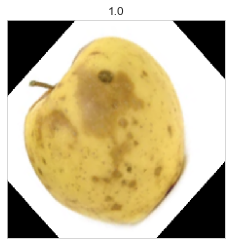

In [19]:
plt.imshow(sample_train_images[1])
plt.title(labels[1])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

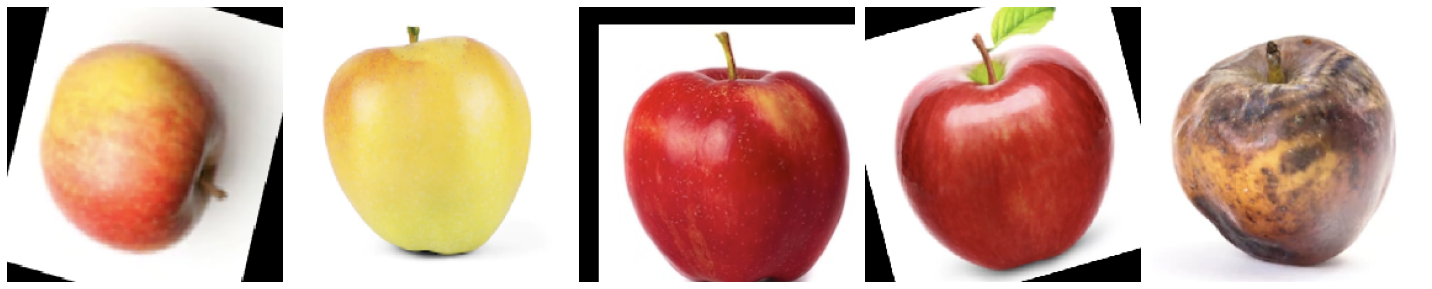

In [20]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_train_images[15:20])

In [21]:
model = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        1

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit_generator(train_data_gen,epochs=epochs,
                             validation_data=val_data_gen)

C:\Users\Dany\.conda\envs\kajal\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
41/41 [==============================] - 844s 20s/step - loss: 1.4150 - accuracy: 0.5616 - val_loss: 0.6792 - val_accuracy: 0.6034
Epoch 2/10
41/41 [==============================] - 809s 20s/step - loss: 0.6298 - accuracy: 0.6362 - val_loss: 0.5493 - val_accuracy: 0.7691
Epoch 3/10
41/41 [==============================] - 801s 20s/step - loss: 0.4216 - accuracy: 0.8107 - val_loss: 0.3827 - val_accuracy: 0.8745
Epoch 4/10
41/41 [==============================] - 810s 20s/step - loss: 0.3266 - accuracy: 0.8706 - val_loss: 0.3505 - val_accuracy: 0.8825
Epoch 5/10
41/41 [==============================] - 815s 20s/step - loss: 0.2400 - accuracy: 0.9103 - val_loss: 0.3806 - val_accuracy: 0.8243
Epoch 6/10
41/41 [==============================] - 809s 20s/step - loss: 0.2045 - accuracy: 0.9187 - val_loss: 0.3407 - val_accuracy: 0.8484
Epoch 7/10
41/41 [==============================] - 819s 20s/step - loss: 0.2352 - accuracy: 0.9081 - val_loss: 0.3145 - val_accuracy: 0.8574
Epoch 

In [25]:
history.history

{'loss': [1.415027379989624,
  0.6297743916511536,
  0.4215688705444336,
  0.32658055424690247,
  0.24002234637737274,
  0.20452433824539185,
  0.23515217006206512,
  0.18174229562282562,
  0.16850897669792175,
  0.16010819375514984],
 'accuracy': [0.5615861415863037,
  0.6361833810806274,
  0.810656726360321,
  0.870631992816925,
  0.9102849960327148,
  0.9187113046646118,
  0.908054530620575,
  0.9254027009010315,
  0.9358116388320923,
  0.9355638027191162],
 'val_loss': [0.6792314052581787,
  0.5493388175964355,
  0.38269510865211487,
  0.35045841336250305,
  0.3805651366710663,
  0.34074169397354126,
  0.3144552409648895,
  0.4269769489765167,
  0.28631678223609924,
  0.36380910873413086],
 'val_accuracy': [0.6034136414527893,
  0.7690762877464294,
  0.8744980096817017,
  0.8825300931930542,
  0.8242971897125244,
  0.8483935594558716,
  0.8574297428131104,
  0.781124472618103,
  0.8805220723152161,
  0.8132529854774475]}

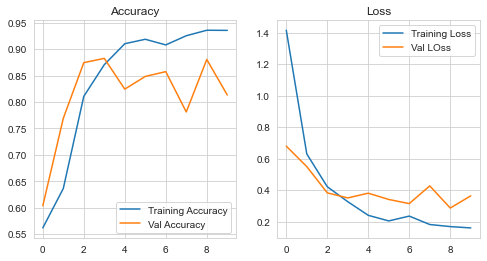

In [26]:
sns.set_style('whitegrid')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc=0)
plt.title('Loss')
plt.show()

In [27]:
import tensorflow as tf

In [28]:
#Saving model
tf.keras.models.save_model(model,'model.h5')

In [29]:
#loading save model
model = tf.keras.models.load_model('model.h5')

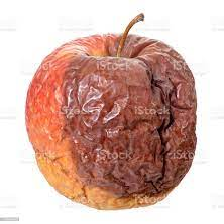

In [38]:
IMG_HIEGHT = 224
IMG_WIDHT = 224
from keras.preprocessing.image import array_to_img, img_to_array, load_img
test_1 = load_img('download1.jpg',target_size=(IMG_HIEGHT,IMG_WIDHT))
test_1

In [39]:
array_1 = img_to_array(test_1)
array_1.shape

(224, 224, 3)

In [40]:
img_test = array_1.reshape(1,224,224,3)
img_test.shape

(1, 224, 224, 3)

In [41]:
classes = ['Fresh','Rotten']
classes[int(model.predict(img_test))]

'Fresh'